In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
cd C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex2\ex2

C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex2\ex2


In [90]:
data1=np.loadtxt('ex2data1.txt',delimiter=',')

In [91]:
data1[:6]

array([[ 34.62365962,  78.02469282,   0.        ],
       [ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ],
       [ 45.08327748,  56.31637178,   0.        ]])

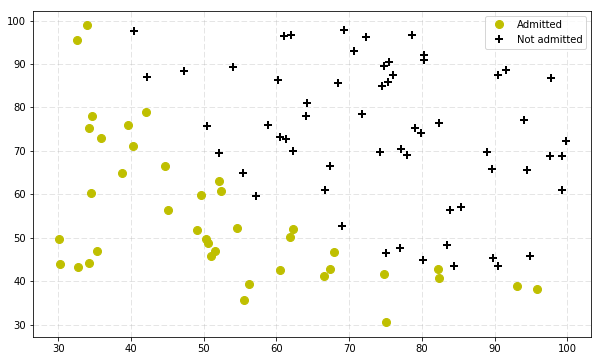

In [92]:
plt.figure(figsize=(10,6))
plt.plot(data1[data1[:,2]==0][:,0],data1[data1[:,2]==0][:,1],'yo',label='Admitted',markersize=8)
plt.plot(data1[data1[:,2]==1][:,0],data1[data1[:,2]==1][:,1],'k+',label='Not admitted',markersize=8,markeredgewidth=2)
plt.legend()
plt.grid(alpha=0.4,linestyle="--")

In [93]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

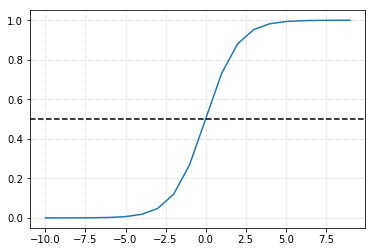

In [94]:
x=list(range(-10,10))
plt.plot(x,[sigmoid(i) for i in x])
plt.axhline(y=0.5,color='k',linestyle='--')
plt.grid(alpha=0.4,linestyle="--")

In [95]:
y=data1[:,-1:]
m=len(y)

In [96]:
def h(x,theta):
    return sigmoid(x.dot(theta))

In [97]:
def costfunc(theta,x,y,lam=0):
    return float((-y.T.dot(np.log(h(x,theta)))-(1-y).T.dot(np.log(1-h(x,theta))))/m+(lam/2/m)*theta[1:].T.dot(theta[1:]))
# 注意符号不要写错，外面是符号，内部是加号；外面没符号，里面全是符号

In [98]:
X=data1[:,:2]

In [99]:
X=np.insert(X,0,1,axis=1)

In [100]:
theta=np.array([[0],[0],[0]])

In [101]:
costfunc(theta,X,y)

0.6931471805599453

In [102]:
def gradientdescent(x,y,theta,iterations=200,alpha=0.01):
    jvec=[]
    for _ in range(iterations):
        delta=1/m*x.T.dot(h(x,theta)-y)
        theta=theta-delta*alpha
    return theta

In [103]:
from scipy import optimize

def optimizeTheta(theta,x,y,lam=0):
    result = optimize.fmin(costfunc, x0=theta, args=(x,y,lam), maxiter=400, full_output=True)
    return result[0], result[1]

In [104]:
gradientdescent(X,y,theta,1500)

array([[-1.14871686],
       [ 0.56980921],
       [ 0.11139426]])

In [105]:
theta, mincost = optimizeTheta(theta,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [106]:
theta

array([-25.16130062,   0.20623142,   0.20147143])

In [107]:
mincost

0.20349770159021513

In [108]:
costfunc(theta,X,y)

0.20349770159021513

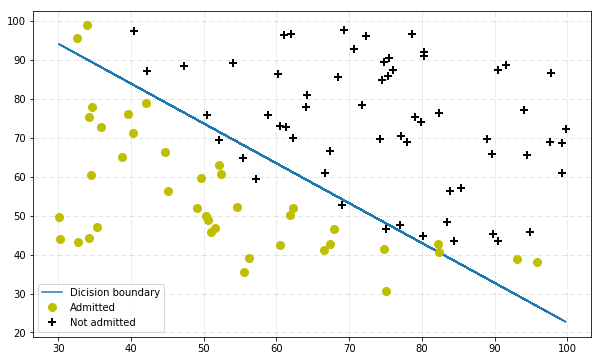

In [109]:
# dicision boundary
plt.figure(figsize=(10,6))
plt.plot(X[:,1:2],-(theta[1]*X[:,1:2]+theta[0])/theta[2],label='Dicision boundary')
plt.plot(data1[data1[:,2]==0][:,0],data1[data1[:,2]==0][:,1],'yo',label='Admitted',markersize=8)
plt.plot(data1[data1[:,2]==1][:,0],data1[data1[:,2]==1][:,1],'k+',label='Not admitted',markersize=8,markeredgewidth=2)
plt.legend()
plt.grid(alpha=0.4,linestyle="--")

In [110]:
# A student with an Exam1 score 45 and Exam2 score 85
# The probability of admission is 0.776
h(np.array([1,45,85]),theta)

0.77629159041124107

In [111]:
def prediction(x,theta):
    count=0
    for i in range(m):
        if h(X[i],theta)>0.5 and y[i]==1:
            count+=1
        elif h(X[i],theta)<0.5 and y[i]==0:
            count+=1
        else:
            continue
    return count/m

In [112]:
prediction(X,theta)

0.89

# Regularized Logistic Regression

In [113]:
cd C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex2\ex2

C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex2\ex2


In [114]:
data2=np.loadtxt('ex2data2.txt',delimiter=',')
X=data2[:,:-1]
y=data2[:,-1:]
m=y.size

In [115]:
X=np.insert(X,0,1,axis=1)

In [116]:
pos=data2[data2[:,2]==1]
neg=data2[data2[:,2]==0]

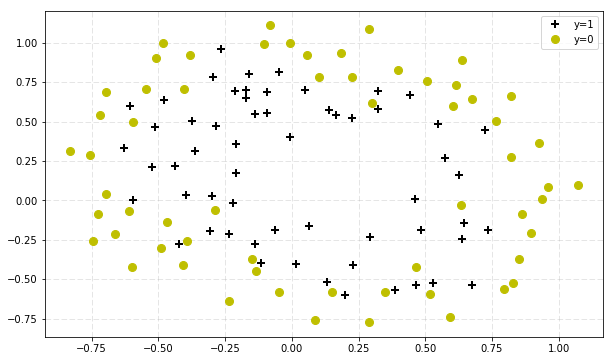

In [117]:
plt.figure(figsize=(10,6))
plt.plot(pos[:,0],pos[:,1],'k+',label='y=1',markersize=8,markeredgewidth=2)
plt.plot(neg[:,0],neg[:,1],'yo',label='y=0',markersize=8)
plt.legend()
plt.grid(alpha=0.4,linestyle="--")

In [118]:
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [119]:
mappedX = mapFeature(X[:,1],X[:,2])

In [120]:
initial_theta=np.zeros((mappedX.shape[1],1))

In [121]:
costfunc(initial_theta,mappedX,y)

0.6931471805599454

In [122]:
def optimizeRegularizedTheta(theta,x,y,lam=0.):
    result = optimize.minimize(costfunc, theta, args=(x,y,lam),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y,10)

In [123]:
xvals = np.linspace(-1,1.5,50)
yvals = np.linspace(-1,1.5,50)
zvals = np.zeros((len(xvals),len(yvals)))

In [124]:
mapFeature(np.array([xvals[1]]),np.array([yvals[1]])).shape

(1, 28)

In [125]:
for i in range(len(xvals)):
    for j in range(len(yvals)):
        myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
        zvals[i][j]=theta.dot(myfeaturesij.T)
zvals=zvals.T

In [126]:
u,v=np.meshgrid(xvals,yvals)

In [127]:
def plotregular(theta,mappedX,y,lam=0):
    theta, mincost = optimizeRegularizedTheta(theta,mappedX,y,lam)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j]=theta.dot(myfeaturesij.T)
    zvals=zvals.T
    u,v=np.meshgrid(xvals,yvals)
    myfmt = { 0:'Lambda = %d'%lam}
    plt.grid(alpha=0.4,linestyle="--")
    mycontour=plt.contour(xvals,yvals,zvals,[0])
    plt.clabel(mycontour,inline=1, fontsize=15, fmt=myfmt)

In [128]:
def plotdata():
    plt.plot(pos[:,0],pos[:,1],'k+',label='y=1',markersize=8,markeredgewidth=2)
    plt.plot(neg[:,0],neg[:,1],'yo',label='y=0',markersize=8)
    plt.legend()

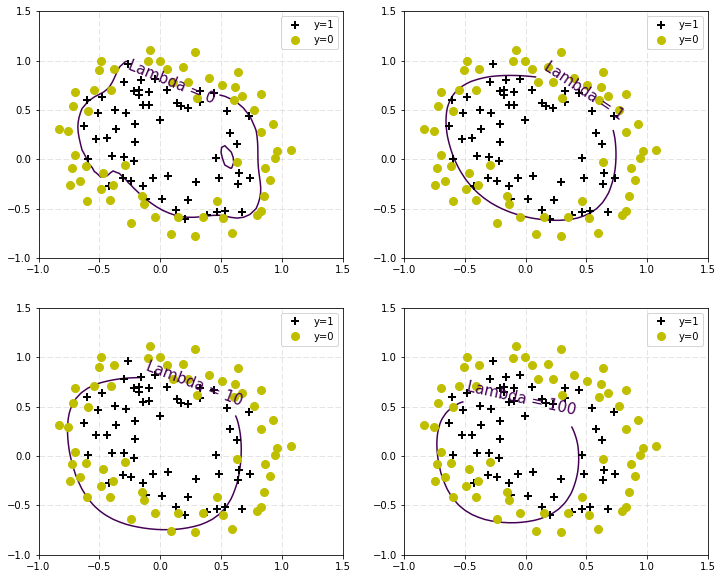

In [129]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotdata()
plotregular(initial_theta,mappedX,y,lam=0)

plt.subplot(222)
plotdata()
plotregular(initial_theta,mappedX,y,lam=1)

plt.subplot(223)
plotdata()
plotregular(initial_theta,mappedX,y,lam=10)

plt.subplot(224)
plotdata()
plotregular(initial_theta,mappedX,y,lam=100)

In [148]:
def hess(x,theta):
    return x.T.dot(h(x,theta)*(1-h(x,theta))*x)/m

In [149]:
def J(x,theta,y):
    return x.T.dot(h(x,theta)-y)/m

In [150]:
def newton(theta,x,y,iterations=10):
    jvec=[]
    for _ in range(iterations):
        theta=theta-np.linalg.inv(hess(x,theta)).dot(J(x,theta,y))
        jvec.append(costfunc(theta,x,y))
    return theta,jvec

In [151]:
cd C:\Users\诚明\Desktop\MachineLearning\ex4Data

C:\Users\诚明\Desktop\MachineLearning\ex4Data


In [163]:
x=pd.read_csv('ex4x.csv',header=None,delim_whitespace=True)
y=pd.read_csv('ex4y.dat',header=None)

In [164]:
x=np.array(x)
y=np.array(y)
m=y.size
theta=np.array([[0],[0],[0]])

In [165]:
x=np.insert(x,0,1,axis=1)

In [155]:
hess(x,theta)

array([[  2.50000000e-01,   9.46250000e+00,   1.68453125e+01],
       [  9.46250000e+00,   3.82465625e+02,   6.43665625e+02],
       [  1.68453125e+01,   6.43665625e+02,   1.15917422e+03]])

In [156]:
J(x,theta,y)

array([[ 0.      ],
       [-2.55625 ],
       [-2.628125]])

In [157]:
theta,jvec=newton(theta,x,y,10)

In [158]:
theta

array([[-16.37874341],
       [  0.14834077],
       [  0.15890845]])

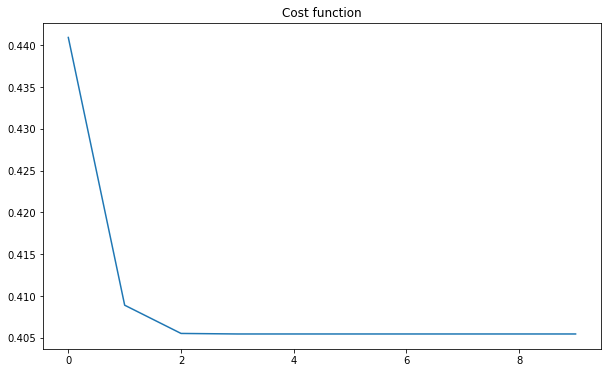

In [140]:
plt.figure(figsize=(10,6))
plt.plot(list(range(len(jvec))),jvec)
plt.title('Cost function')

In [184]:
def newtonmethod(theta,x,y,iterations):
    m=y.size
    for _ in range(iterations):
        H_inv=np.linalg.inv(x.T.dot(h(x,theta)*(1-h(x,theta))*x))
        gradient=x.T.dot(h(x,theta)-y)                                
        theta=theta-H_inv.dot(gradient)
    return theta

In [187]:
cd C:\Users\诚明\Desktop\MachineLearning

C:\Users\诚明\Desktop\MachineLearning


In [240]:
X=np.loadtxt('logistic_x.txt')
y=np.loadtxt('logistic_y.txt')

In [241]:
X=np.insert(X,0,1,axis=1)
start_theta=np.zeros((3,1))
y=y.reshape((y.size,1))

In [242]:
# For y value 1 or -1
def NewtonMethod(theta,x,y,it):
    m=y.size
    for _ in range(it):
        J=-x.T.dot((1-h(y*x,theta))*y)/m                      # h function here has a different definition
        H=x.T.dot(h(y*x,theta)*(1-h(y*x,theta))*x)/m
        theta=theta-np.linalg.inv(H).dot(J)
    return theta

In [271]:
fit_theta=NewtonMethod(start_theta,X,y,20)
fit_theta

array([[-2.6205116 ],
       [ 0.76037154],
       [ 1.17194674]])

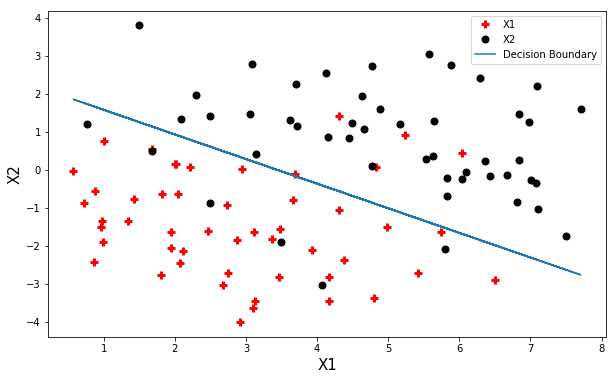

In [280]:
plt.figure(figsize=(10,6))
plt.plot(X[np.where(y==-1)[0],1],X[np.where(y==-1)[0],2],'r+',markersize=8,markeredgewidth=3,label='X1')
plt.plot(X[np.where(y==1),1][0],X[np.where(y==1)[0],2],'ko',markersize=7,label='X2')
plt.plot(X[:,1],-fit_theta[1]/fit_theta[2]*X[:,1]-fit_theta[0]/fit_theta[2],label='Decision Boundary')
plt.xlabel('X1',fontsize=15)
plt.ylabel('X2',fontsize=15)
plt.legend()